# DTSC670: Foundations of Machine Learning Models

## Assignment 8: Polynomial Regression II

#### Name:

### CodeGrade
Please note that this assignment will be manually graded.  **You will have one attempt at submitting this assignment.**

Since we are merely using CodeGrade for this assignment as a platform to manually grade assignments, CodeGrade will not  execute your code for this assignment. Rather, it simply renders your Jupyter Notebook in the web browser. Therefore, any code blocks that generate output must be fully executed within the notebook prior to submission. Otherwise, we will not see the output of your code!

### Details

The purpose of this assignment is expose you to a (second) polynomial regression problem. Your goal is to:

1. Create the following figure using matplotlib, which plots the data from the file called `PolynomialRegressionData_II.csv`.  This figure is generated using the same code that you developed in Assignment 3 of Module 2 - you should reuse that same code.
2. Perform a PolynomialFeatures transformation, then perform linear regression to calculate the optimal ordinary least squares regression model parameters.
3. Recreate the first figure by adding the best fit curve to all subplots.
4. Infer the true model parameters.

Below is the first figure you must emulate:

<img src="PolynomialDataPlot_III.png" width ="800" />

Below is the second figure you must emulate:

<img src="PolynomialDataPlot_IV.png" width ="800" />

Each of the two figures has four subplots.  Note the various viewing angles that each subplot presents - you can achieve this with the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) method. Use the same color scheme for the datapoints shown here, which is called `jet`.  Be sure to label your axes as shown.

In [2]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
import os
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Import Data

Begin by importing the data from the file called `PolynomialRegressionData_II.csv`.

In [3]:
import pandas as pd

#import data from Excel
fileName = "PolynomialRegressionData_II.csv"
poly_reg = pd.read_csv(fileName)

#view data
print(poly_reg)


#filter variable data for graph

x = poly_reg['x']
y = poly_reg['y']
z = poly_reg['z']

#Place features in DataFrame
poly_reg2= poly_reg[['x', 'y']]


             x          y              z
0    -3.319120  -4.692237   -3397.468030
1     8.812980   9.128139   17492.040880
2   -19.995425 -19.149264 -169660.383400
3    -7.906697  -8.766213  -17145.826560
4   -14.129764 -13.779218  -63847.758980
..         ...        ...            ...
145 -15.700235 -16.744824 -113760.620500
146 -10.971626  -8.920453  -18055.943870
147   8.519559   9.105221   17351.776520
148   2.388679   2.818205    -306.303994
149 -19.497761 -20.104759 -196160.262300

[150 rows x 3 columns]


# Create First Image 

Use the [scatter3D](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) to plot in three dimensions.  Create four [subplots](https://matplotlib.org/3.1.0/gallery/recipes/create_subplots.html) with the appropriate viewing angles using the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) function.

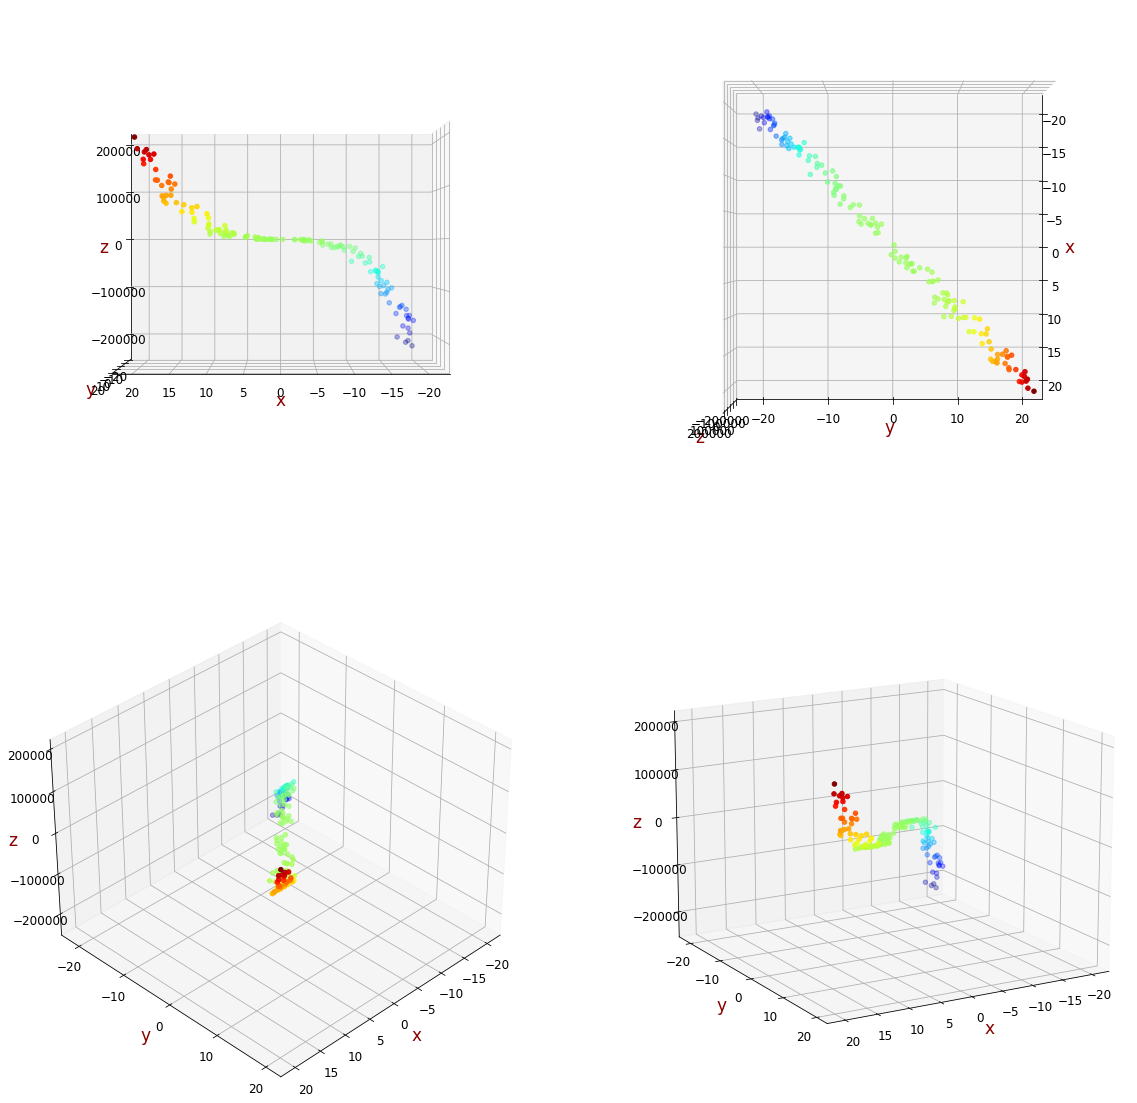

In [4]:
from mpl_toolkits.mplot3d import Axes3D

### ENTER CODE HERE ###

fig = plt.figure(figsize=(20,20))
 
# Create First Subplot
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.view_init(0,-270)
# Create Plot and change color
ax1.scatter3D(x, y, z, c=z, cmap='jet')
# Add axis labels
ax1.set_xlabel('x', color='darkred', size=17)
ax1.set_ylabel('y', color='darkred', size=17)
ax1.set_zlabel('z', color='darkred',size=17)


# Create Second Subplot
ax2 = fig.add_subplot(2, 2, 3, projection='3d')
ax2.view_init(35,45)
# Create Plot and change color
ax2.scatter3D(x, y, z, c=z, cmap='jet')
# Add axis labels
ax2.set_xlabel('x', color='darkred', size=17)
ax2.set_ylabel('y', color='darkred', size=17)
ax2.set_zlabel('z', color='darkred', size=17)


# Create Third Subplot
ax3 = fig.add_subplot(2, 2, 2, projection='3d')
ax3.view_init(90,360)
# Create Plot and change color
ax3.scatter3D(x, y, z, c=z, cmap='jet')
# Add axis labels
ax3.set_xlabel('x', color='darkred', size=17)
ax3.set_ylabel('y', color='darkred', size=17)
ax3.set_zlabel('z', color='darkred', size=17)


# Create Fourth Subplot
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.view_init(15,60)
# Create Plot and change color
ax4.scatter3D(x, y, z, c=z, cmap='jet')
# Add axis labels
ax4.set_xlabel('x', color='darkred', size=17)
ax4.set_ylabel('y', color='darkred', size=17)
ax4.set_zlabel('z', color='darkred', size=17)
# Show plot
plt.show()


# Perform Polynomial Features Transformation
Perform a polynomial transformation on your features.

In [5]:
from sklearn.preprocessing import PolynomialFeatures

### ENTER CODE HERE ###
#Convert to numpy array
poly_reg3 = np.asarray(poly_reg2)
#Set hyperparameters
poly_features = PolynomialFeatures(degree=3, include_bias=False)
#Transform features
X_poly = poly_features.fit_transform(poly_reg3)
#Put transformed data in DataFrame
X_poly2 = pd.DataFrame(X_poly)

#View data
X_poly2

,0,1,2,3,4,5,6,7,8
0,-3.319120,-4.692237,11.016556,15.574097,22.017089,-36.565270,-51.692295,-73.077357,-103.309404
1,8.812980,9.128139,77.668612,80.446105,83.322924,684.491903,708.969895,734.323241,760.583243
2,-19.995425,-19.149264,399.817021,382.897680,366.694326,-7994.511268,-7656.201837,-7332.208888,-7021.926579
3,-7.906697,-8.766213,62.515859,69.311791,76.846491,-494.293960,-548.027338,-607.601927,-673.652711
4,-14.129764,-13.779218,199.650241,194.697109,189.866859,-2821.010864,-2751.024274,-2682.773986,-2616.216921
...,...,...,...,...,...,...,...,...,...
145,-15.700235,-16.744824,246.497374,262.897673,280.389138,-3870.066660,-4127.555199,-4402.175316,-4695.066832
146,-10.971626,-8.920453,120.376587,97.871878,79.574482,-1320.726949,-1073.813690,-873.061492,-709.840427
147,8.519559,9.105221,72.582889,77.572471,82.905053,618.374223,660.883263,706.314511,754.868851
148,2.388679,2.818205,5.705789,6.731789,7.942282,13.629299,16.080085,18.971564,22.382982


# Train Linear Regression Model

From the `sklearn.linear_model` library, import the `LinearRegression` class.  Instantiate an object of this class called `model`, and fit it to the data. `x` and `y` will be your training data and `z` will be your response. Print the optimal model parameters to the screen by completing the following `print()` statements.

In [6]:
### ENTER CODE HERE ###
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
#Filter features and response variables
features = X_poly2
response = poly_reg[['z']]

#Train the model
model.fit(features, response)

#View coefficients
coefs, intercept = model.coef_, model.intercept_
print("Computed Model Coefficients: ", coefs)
print("Computed Model Intercept : ", intercept)



Computed Model Coefficients:  [[13.11050011 -0.1255161  -0.06438648  0.12522101 -0.0604412  -0.03261309
   0.10037932 -0.10274249 24.03500492]]
Computed Model Intercept :  [-875.0064856]


# Create Second Image

Use the following `x_fit` and `y_fit` data to compute `z_fit` by invoking the model's `predict()` method.  This will allow you to plot the line of best fit that is predicted by the model.

In [9]:
# Plot Curve Fit
x_fit = np.linspace(-21,21,1000)
y_fit = x_fit

#Put features in DataFrame
features2 = pd.DataFrame({'x': x_fit, 'y':y_fit})
#Transform features
features3 = poly_features.fit_transform(features2)

z_fit = model.predict(features3)

#Flatten z_fit to make it one dimensional
z_fit2 = z_fit.flatten()

Recreate the first image, but plot the line of best fit in each of the subplots as well.

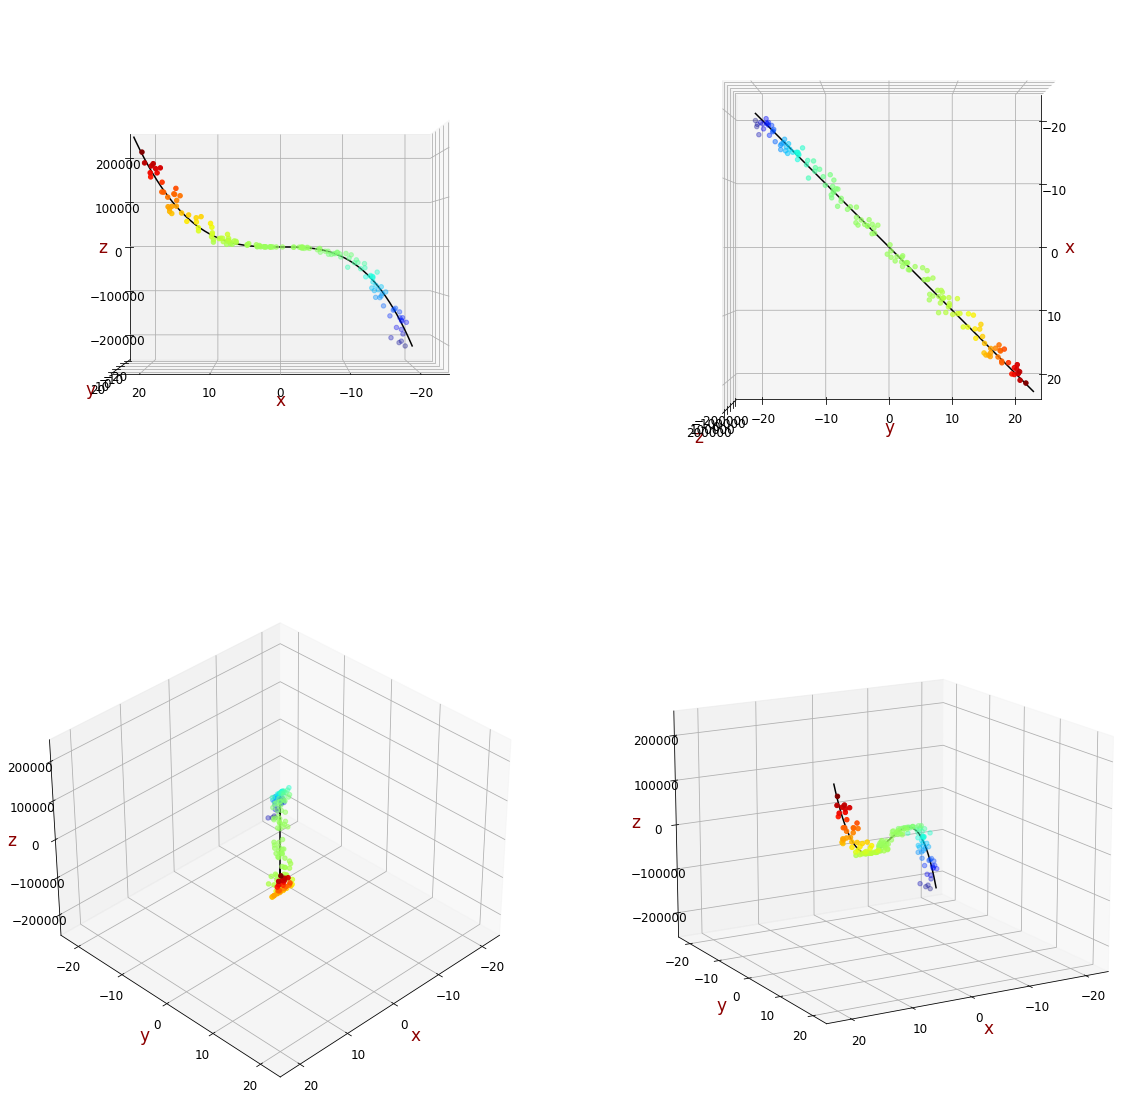

In [10]:
fig = plt.figure(figsize=(20,20))
 
# Create First Subplot
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.view_init(0,-270)
# Create Plot and change color
ax1.scatter3D(x, y, z, c=z, cmap='jet')
# Add axis labels
ax1.set_xlabel('x', color='darkred', size=17)
ax1.set_ylabel('y', color='darkred', size=17)
ax1.set_zlabel('z', color='darkred', size=17)
#Add regression line
ax1.plot3D(x_fit ,y_fit, z_fit2, c='black')


# Create Second Subplot
ax2 = fig.add_subplot(2, 2, 3, projection='3d')
ax2.view_init(35,45)
# Create Plot and change color
ax2.scatter3D(x, y, z, c=z, cmap='jet')
# Add axis labels
ax2.set_xlabel('x', color='darkred', size=17)
ax2.set_ylabel('y', color='darkred', size=17)
ax2.set_zlabel('z', color='darkred', size=17)
#Add regression line
ax2.plot3D(x_fit, y_fit, z_fit2, c='black')

# Create Third Subplot
ax3 = fig.add_subplot(2, 2, 2, projection='3d')
ax3.view_init(90,360)
# Create Plot and change color
ax3.scatter3D(x, y, z, c=z, cmap='jet')
# Add axis labels
ax3.set_xlabel('x', color='darkred', size=17)
ax3.set_ylabel('y', color='darkred', size=17)
ax3.set_zlabel('z', color='darkred', size=17)
#Add regression line
ax3.plot3D(x_fit, y_fit, z_fit2,c='black')


# Create Fourth Subplot
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.view_init(15 ,60)
# Create Plot and change color
ax4.scatter3D(x, y, z, c=z, cmap='jet')
# Add axis labels
ax4.set_xlabel('x', color='darkred', size=17)
ax4.set_ylabel('y', color='darkred', size=17)
ax4.set_zlabel('z', color='darkred', size=17)
#Add regression line
ax4.plot3D(x_fit, y_fit, z_fit2, c='black')
# Show plot
plt.show()

# Infer the True Model Parameters

Provided that the true model parameters are **integer values**, you are able to infer the true model parameters by rounding the coefficients and the intercept to the nearest integer value.  You may "hard-code" these values into the below print statements. (See the assignment 3 template for more information)

Use the `get_feature_names()` (this has been deprecated -- depending on your version of sklearn, you may need to use `get_feature_names_out()`) method of the `PolynomialFeatures` class to be certain of which coefficients you calculated!  You need to report your final answers in a format that is ___abundantly clear___ to me which which coefficient corresponds to which dependent variable of the model!  You may add more `print()` statements to accomplish this if you must.

In [13]:
print("True Model Coefficients:", "13, 0, 0, 0, 0, 0, 0, 0, 24 ")
print("True Model Intercept :", "-875")

print('True Model Coefficient for x: ' '13')
print('True Model Coefficient for y: ' '0')
print('True Model Coefficient for x^2: ' '0')
print('True Model Coefficient for x*y: ' '0')
print('True Model Coefficient for y^2: ' '0')
print('True Model Coefficient for x^3: ' '0')
print('True Model Coefficient for x^2*y: ' '0')
print('True Model Coefficient for x*y^2: ' '0')
print('True Model Coefficient for y^3: ' '24')

True Model Coefficients: 13, 0, 0, 0, 0, 0, 0, 0, 24 
True Model Intercept : -875
True Model Coefficient for x: 13
True Model Coefficient for y: 0
True Model Coefficient for x^2: 0
True Model Coefficient for x*y: 0
True Model Coefficient for y^2: 0
True Model Coefficient for x^3: 0
True Model Coefficient for x^2*y: 0
True Model Coefficient for x*y^2: 0
True Model Coefficient for y^3: 24


In [11]:
#Get feature names
poly_features.get_feature_names(['x','y'])

['x', 'y', 'x^2', 'x y', 'y^2', 'x^3', 'x^2 y', 'x y^2', 'y^3']